In [3]:
##IMPORTS##
import tensorflow as tf
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

In [4]:
##Setting directory paths to the training data & test data image sets
data_dir=pathlib.Path('C:\\Users\\Pickle Mustard\\Documents\\Machine Learning Projects\\4375-Intro-to-Machine-Learning\\Project_6_Deep_Learning\\train')
test_dir=pathlib.Path('C:\\Users\\Pickle Mustard\\Documents\\Machine Learning Projects\\4375-Intro-to-Machine-Learning\\Project_6_Deep_Learning\\test')

In [5]:
batch_size = 128
num_classes = 10
epochs = 20
img_height=180
img_width=180

In [6]:
##Creating the datasets with the images
train_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=6461,
image_size=(img_height,img_width),)

Found 7328 files belonging to 15 classes.
Using 1465 files for validation.


In [7]:
##Test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
test_dir,
validation_split=0.2,
subset="validation",
seed=6461,
image_size=(img_height,img_width),)

Found 1841 files belonging to 15 classes.
Using 368 files for validation.


In [8]:
##Little bit of validation
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3

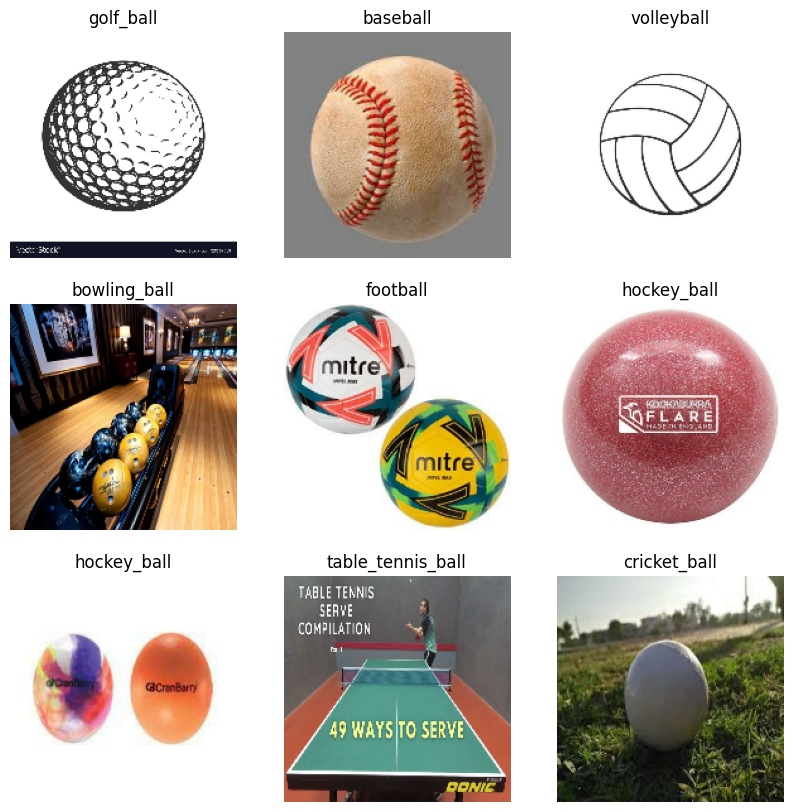

In [9]:
##Little more validation
class_names = train_ds.class_names
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The images in the dataset range in how they are presented. It's not all just images of the ball from perfect lighting and taken at slightly different angles. Even here, there are images with text, different numbers of the identifying image, different lighting conditions, different background conditions, and the worst is the table tennis image which only has a few pixels relating to the identifier. So let's see how well this will perform. I'm not expecting a lot out of this.

In [16]:
##Referencing # of identifiers
normalization_layer = tf.keras.layers.Rescaling(1./255)
print(class_names)

['american_football', 'baseball', 'basketball', 'billiard_ball', 'bowling_ball', 'cricket_ball', 'football', 'golf_ball', 'hockey_ball', 'hockey_puck', 'rugby_ball', 'shuttlecock', 'table_tennis_ball', 'tennis_ball', 'volleyball']


In [17]:
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.027902687 1.0


In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
num_classes = 15

In [16]:
##Starting with a dense model. This took a long time to train...
dense_model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    #tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes),
])
#dense_model.summary()

In [17]:
dense_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   optimizer='adam',
                   metrics=['accuracy'])

In [18]:
history = dense_model.fit(train_ds, batch_size=batch_size, epochs=20, verbose=1, validation_data=test_ds)

Epoch 1/20
46/46 [==============================] - 147s 3s/step - loss: 66.9512 - accuracy: 0.0881 - val_loss: 2.6981 - val_accuracy: 0.0788
Epoch 2/20
46/46 [==============================] - 144s 3s/step - loss: 2.5129 - accuracy: 0.2096 - val_loss: 2.7578 - val_accuracy: 0.1413
Epoch 3/20
46/46 [==============================] - 145s 3s/step - loss: 2.2243 - accuracy: 0.3119 - val_loss: 3.0507 - val_accuracy: 0.1033
Epoch 4/20
46/46 [==============================] - 150s 3s/step - loss: 1.8567 - accuracy: 0.4587 - val_loss: 3.3114 - val_accuracy: 0.2011
Epoch 5/20
46/46 [==============================] - 148s 3s/step - loss: 1.4254 - accuracy: 0.6089 - val_loss: 3.8457 - val_accuracy: 0.1902
Epoch 6/20
46/46 [==============================] - 147s 3s/step - loss: 1.0666 - accuracy: 0.7160 - val_loss: 4.2640 - val_accuracy: 0.1875
Epoch 7/20
46/46 [==============================] - 153s 3s/step - loss: 1.0214 - accuracy: 0.7611 - val_loss: 4.1538 - val_accuracy: 0.1902
Epoch 8/20
4

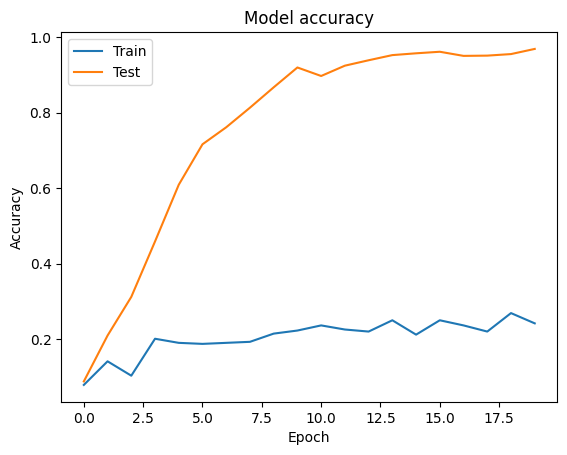

In [19]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Ok, not great. Pretty bad if we're being honest. It was able to predict pretty well through the training set but once it started to attempt to validate, it didn't get higher than 27% correct. That's abyssmal. I tried different drop-out rates and densities but could not get it above around 30% correct during validation. Might be an indicator of the poor-quality of the image set but let's continue and find out how well a convolutional model does.

In [58]:
##Convolution Neural Network with increasing filters
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, name="outputs"),
])

In [59]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [60]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20
)

Epoch 1/20
46/46 [==============================] - 16s 334ms/step - loss: 2.6751 - accuracy: 0.1106 - val_loss: 2.6129 - val_accuracy: 0.1141
Epoch 2/20
46/46 [==============================] - 15s 317ms/step - loss: 2.5003 - accuracy: 0.1863 - val_loss: 2.5447 - val_accuracy: 0.1576
Epoch 3/20
46/46 [==============================] - 14s 315ms/step - loss: 2.2701 - accuracy: 0.2874 - val_loss: 2.4961 - val_accuracy: 0.1984
Epoch 4/20
46/46 [==============================] - 15s 319ms/step - loss: 1.9280 - accuracy: 0.4061 - val_loss: 2.5582 - val_accuracy: 0.2065
Epoch 5/20
46/46 [==============================] - 14s 315ms/step - loss: 1.4835 - accuracy: 0.5522 - val_loss: 2.6851 - val_accuracy: 0.2582
Epoch 6/20
46/46 [==============================] - 15s 317ms/step - loss: 1.0730 - accuracy: 0.6867 - val_loss: 2.9474 - val_accuracy: 0.2364
Epoch 7/20
46/46 [==============================] - 15s 318ms/step - loss: 0.7675 - accuracy: 0.7652 - val_loss: 3.8902 - val_accuracy: 0.2065

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

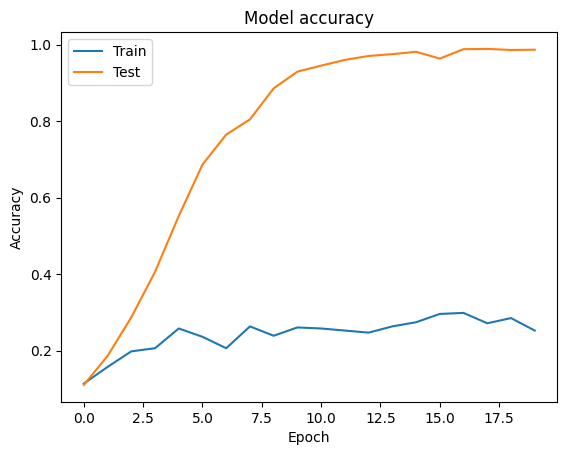

In [62]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

That's slightly better... though not really. It seems more consistent in its predictions lying around the 27% range correct. That's just not good but a little more consistent than the dense NN. Let's try with a consistent size for the filters.

In [20]:
##Convolution Neural Network with increasing filters
second_cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, name="outputs"),
])

In [21]:
second_cnn_model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [22]:
history = second_cnn_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20
)

Epoch 1/20
46/46 [==============================] - 26s 536ms/step - loss: 2.6516 - accuracy: 0.1065 - val_loss: 2.5312 - val_accuracy: 0.1685
Epoch 2/20
46/46 [==============================] - 21s 461ms/step - loss: 2.4183 - accuracy: 0.2225 - val_loss: 2.4682 - val_accuracy: 0.2283
Epoch 3/20
46/46 [==============================] - 20s 438ms/step - loss: 2.1482 - accuracy: 0.3222 - val_loss: 2.5832 - val_accuracy: 0.2092
Epoch 4/20
46/46 [==============================] - 21s 454ms/step - loss: 1.7895 - accuracy: 0.4355 - val_loss: 2.5838 - val_accuracy: 0.2446
Epoch 5/20
46/46 [==============================] - 21s 453ms/step - loss: 1.3691 - accuracy: 0.5768 - val_loss: 2.8847 - val_accuracy: 0.2636
Epoch 6/20
46/46 [==============================] - 20s 445ms/step - loss: 1.0060 - accuracy: 0.7003 - val_loss: 3.1939 - val_accuracy: 0.2717
Epoch 7/20
46/46 [==============================] - 20s 447ms/step - loss: 0.7830 - accuracy: 0.7611 - val_loss: 3.3039 - val_accuracy: 0.2663

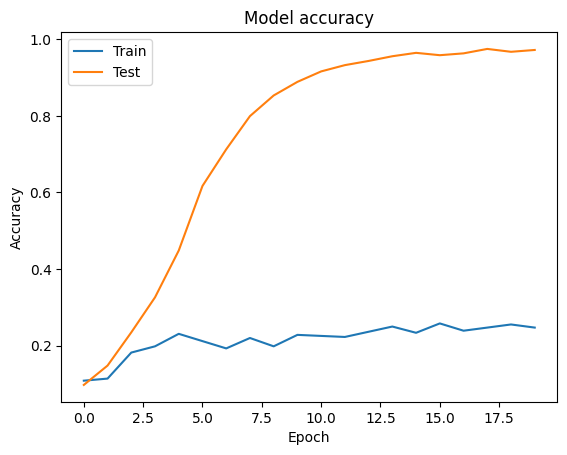

In [69]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Not better. Seems like the CNN is very minorly better at classifying the images than the dense nn but both get failing grades. Next up is a pre-trained model.

In [47]:
##Trying a Pre-trained model
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

In [48]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1280)


In [49]:
base_model.trainable=False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 23, 23, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 23, 23, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 23, 23, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 23, 23, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 12, 12, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 12, 12, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 12, 12, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 12, 12, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 12, 12, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 12, 12, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 12, 12, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 6, 6, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 6, 6, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 6, 6, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 6, 6, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [50]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [51]:
prediction_layer = tf.keras.layers.Dense(15)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 15)


In [52]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [53]:
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [54]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 180, 180, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                             

In [55]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(test_ds)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

12/12 [==============================] - 5s 298ms/step - loss: 3.4748 - accuracy: 0.0380
initial loss: 3.47
initial accuracy: 0.04


In [57]:
history = model.fit(train_ds,
                    epochs=20,
                    validation_data=test_ds)

Epoch 1/20
46/46 [==============================] - 21s 466ms/step - loss: 2.3879 - accuracy: 0.2430 - val_loss: 2.1833 - val_accuracy: 0.3179
Epoch 2/20
46/46 [==============================] - 22s 469ms/step - loss: 2.1727 - accuracy: 0.3181 - val_loss: 2.0124 - val_accuracy: 0.3696
Epoch 3/20
46/46 [==============================] - 21s 462ms/step - loss: 2.0468 - accuracy: 0.3570 - val_loss: 1.8680 - val_accuracy: 0.4212
Epoch 4/20
46/46 [==============================] - 22s 473ms/step - loss: 1.8687 - accuracy: 0.4082 - val_loss: 1.7505 - val_accuracy: 0.4837
Epoch 5/20
46/46 [==============================] - 22s 479ms/step - loss: 1.7765 - accuracy: 0.4546 - val_loss: 1.6481 - val_accuracy: 0.5217
Epoch 6/20
46/46 [==============================] - 20s 446ms/step - loss: 1.6857 - accuracy: 0.4812 - val_loss: 1.5628 - val_accuracy: 0.5435
Epoch 7/20
46/46 [==============================] - 21s 466ms/step - loss: 1.5709 - accuracy: 0.5133 - val_loss: 1.4949 - val_accuracy: 0.5652

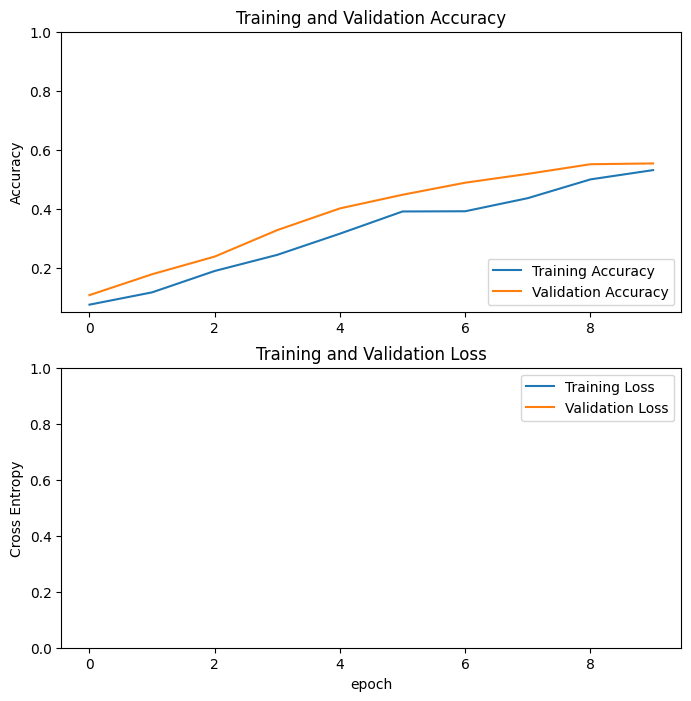

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

This is much better than the others. Around a 50% accuracy rate on validation is far more acceptable than the 1/4 accuracy rate on the prior models. 

So in total, the order in which I would use these are the pretrained -> increasing filter CNN -> static filter CNN -> Dense NN. The pre-trained model has an accuracy rate that is fine for the use of describing items from images. It's not that important so the failure rate is good enough. The model it was trained off of has a much larger dataset it was trained from so it makes sense why it would have a greater success rate than this rather miniscule one that I used to train from. It was also relatively quick in training, taking around the same time as it took to train the CNNs. I would avoid using the Dense models for these types of image training tasks. The training time took a while and was still inaccurate. The CNNs could have more use if the dataset of images was better. They train quickly so iterations can take place. But a lot of tweaking would have to be done with both the image dataset and the layers to reduce the overfitting it seemed to do when working with such a small dataset.

---------------------------------------------------------------------------------------------------------------------

# Human vs Machine
Time to test the class and see how well you do in comparison to the prediction abilities of the computer.


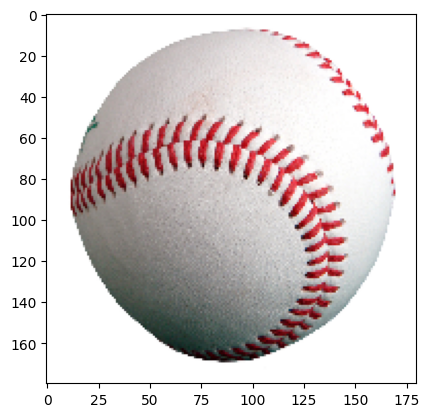

In [88]:
#Getting all the images in
beachball_image_path = "gametime/beachball_prediction.jpg"
baseball_image_path = "gametime/baseball_prediction.jpg"
kettle_image_path = "gametime/kettle_prediction.jpg"
wreckingball_image_path = "gametime/wreckingball_prediction.jpg"
cat_image_path = "gametime/cat_prediction.jpg"
beachball_image = tf.keras.preprocessing.image.load_img(beachball_image_path, target_size=(224, 224))
baseball_image = tf.keras.preprocessing.image.load_img(baseball_image_path, target_size=(180, 180))
kettle_image = tf.keras.preprocessing.image.load_img(kettle_image_path, target_size=(224, 224))
wreckingball_image = tf.keras.preprocessing.image.load_img(wreckingball_image_path, target_size=(224, 224))
cat_image = tf.keras.preprocessing.image.load_img(cat_image_path, target_size=(224, 224))
##Starting with a baseball, which is included in the set
plt.imshow(baseball_image)
plt.show()

## Is the above image:
### a: Baseball
### b: Hockey Puck

In [77]:
img_array = tf.keras.preprocessing.image.img_to_array(baseball_image)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(img_batch)

## 

In [78]:
prediction = model.predict(img_preprocessed)

1/1 [==============================] - 0s 35ms/step


In [79]:
print(class_names)
#print(tf.keras.applications.mobilenet_v2.decode_predictions(prediction))

['american_football', 'baseball', 'basketball', 'billiard_ball', 'bowling_ball', 'cricket_ball', 'football', 'golf_ball', 'hockey_ball', 'hockey_puck', 'rugby_ball', 'shuttlecock', 'table_tennis_ball', 'tennis_ball', 'volleyball']


In [80]:
print(prediction)

[[-3.9127197  -1.4664302  -2.1226485  -0.98599964 -0.7799562  -0.83548254
  -2.6480684  -1.5858105  -2.0919716   0.22281113 -2.6008315  -1.6556082
  -0.31354156 -0.7221802  -0.9952256 ]]


## That's right, a hockey puck

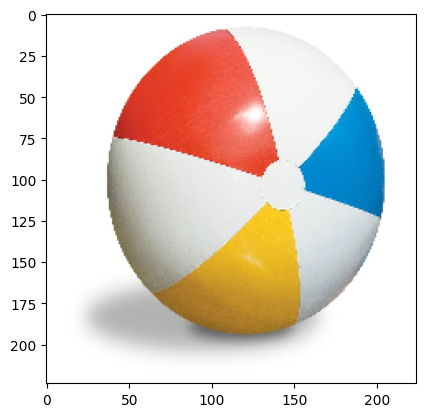

In [81]:
plt.imshow(beachball_image)
plt.show()

## Is the above image:
### a: Table Tennis Ball
### b: Volleyball

In [ ]:
img_array = tf.keras.preprocessing.image.img_to_array(beachball_image)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(img_batch)
prediction = model.predict(img_preprocessed)
print(prediction)

## That's right, a Table Tennis Ball

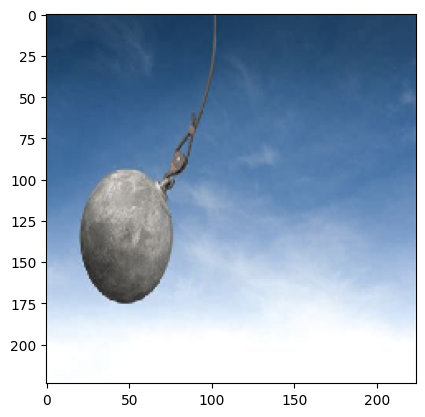

In [83]:
plt.imshow(wreckingball_image)
plt.show()

## Is the above image:
### a: Table Tennis Ball
### b: Wrecking Ball
### c: Bowling Ball

In [84]:
img_array = tf.keras.preprocessing.image.img_to_array(wreckingball_image)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(img_batch)
prediction = model.predict(img_preprocessed)
print(prediction)

1/1 [==============================] - 0s 43ms/step
[[-3.4980984  -2.069184   -2.797303   -0.58421934 -1.4077848  -1.5072114
  -2.5720487  -1.52115    -2.077485    0.00589995 -3.1487935  -1.3932493
   0.45937595 -0.6425327  -0.35317883]]


## That's right, a Table Tennis Ball
## Final one

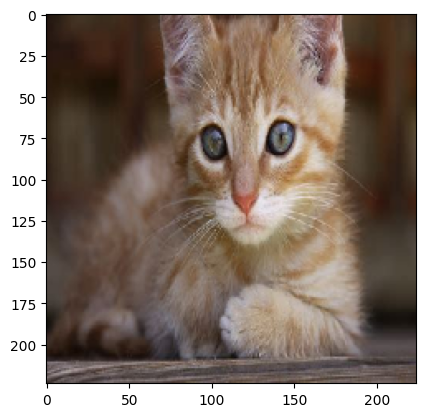

In [89]:
plt.imshow(cat_image)
plt.show()

## Is the above image:
### a: Table Tennis Ball
### b: Baseball
### c: Bowling Ball
### d: Cat

In [90]:
img_array = tf.keras.preprocessing.image.img_to_array(cat_image)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(img_batch)
prediction = model.predict(img_preprocessed)
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[-3.435506   -1.9267582  -2.8801734  -0.57759637 -1.3328717  -1.3097317
  -2.690632   -1.6267952  -2.0840218   0.01304085 -3.297552   -1.391803
   0.42075038 -0.52846014 -0.38047805]]


## That's Right, None of them. It's a hockey puck